## Project 1: 
Interpolation with Autoregressive (AR)
Model

Read and Plot

In [1]:
withNAN = dlmread('flights.csv',',',1,0,"emptyvalue", NaN);#get NaN values as well
woutNAN = dlmread('flights.csv',',',1,0);#get 0s for NaNs

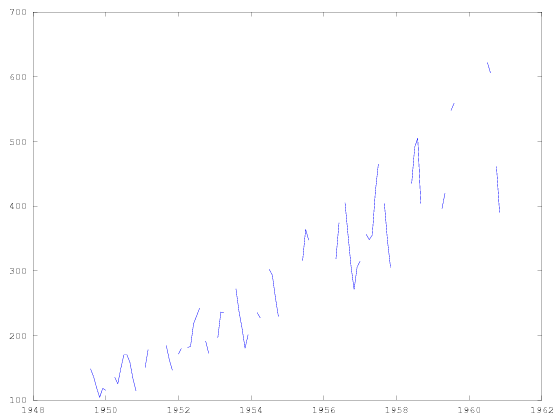

In [2]:
T = withNAN(:,1);#Time
X = withNAN(:,2);#number of passenger
plot(T,X)

In [3]:
Xob = woutNAN(:,2);
obsInd = find(Xob);#find all non 0s
misInd = find(~Xob);#find all 0s
Xmi = zeros(length(Xob),1);#fill with 1s
Xmi(misInd) = 1;#assign 0 to non missing indices

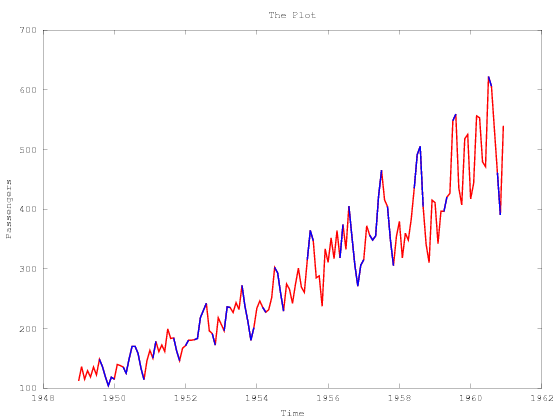

In [4]:
M=4;
N=length(Xob);
Xx=Xob+Xmi;

for j=1:1000
    Xmn=Xx(M+1:N);
    
    #initializing Gx
    Gx=[];
    for (i=1:M)
        Gx=[Gx Xx(M+1-i:N-i)];
    endfor
    A = Gx\Xmn;
    
    #initializing Ga
    Ga=zeros(N-4,N);
    for (i=1:N-M)
        Ga(i,i:i+M)=[A' -1];
    endfor
    
    Xx(misInd) = Ga(:,misInd)\(-1*Ga*Xob);
endfor
plot(T,Xx,"r","linewidth",5)
line(T,X,"color","b","linewidth",5)
xlabel ("Time");
ylabel ("Passengers");
title ("The Plot");

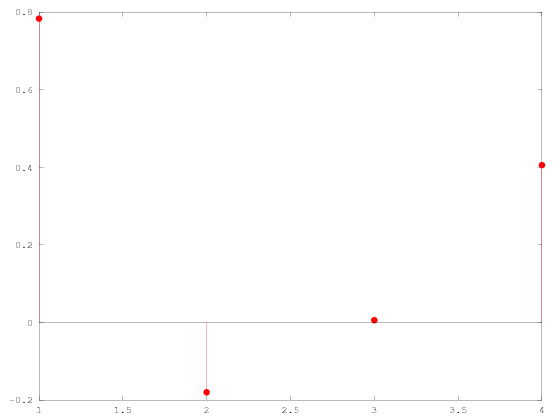

In [5]:
stem(A,"filled","r",'marker','o')#Print Coefs

Er = 0


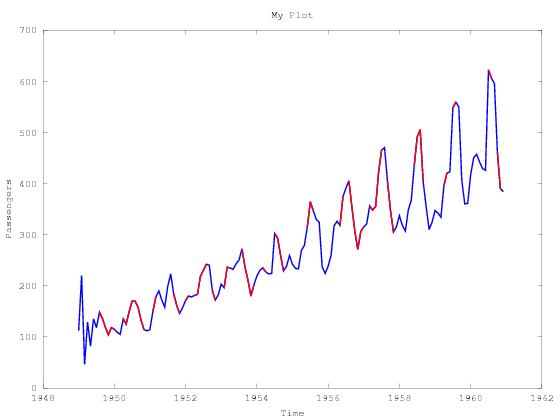

In [6]:
#My approach for solving the problem

Xtemp = X(1:length(X));
ff=7;#starting point
Gx = [];
Xx = [];
Er = 0;
A  = [];
for i=(8):(length(Xtemp)-4)#(length(Xtemp)-4)
    if(isnan(Xtemp(i+4)))
        if(sum(sum(isnan(Gx\Xx)))==0)
           A = Gx\Xx;#Gx'*inv(Gx*Gx')*Xx;  
        endif
        
        Xtemp(i+4)=round([Xtemp(i+3) Xtemp(i+2) Xtemp(i+1) Xtemp(i)]*A);
        if(isinf(Xtemp(i+4)))
            Xtemp(i+4)=2*Xtemp(i+3)-Xtemp(i+2);# linearity
        endif
    else#if value given then calculate A again
        if(sum(sum(isnan(Gx\Xx)))==0)
            if(!isnan(Gx))
                A = Gx\Xx;#Gx'*inv(Gx*Gx')*Xx; 
            endif
        endif
    endif#toparla buraları
    Gx = [Gx; Xtemp(i+3) Xtemp(i+2) Xtemp(i+1) Xtemp(i)];
    Xx = [Xx; Xtemp(i+4)];
    if(!isnan(A))
    #Er = sum(abs(Xtemp(8+4:i+4)-Gx*A))/length(Xtemp(8+4:i+4))
    endif
    
end
Er
for i=9:-1:1
    if(isnan(Xtemp(i)))
        Xtemp(i)=round((Xtemp(i+4)-(Xtemp(i+3)*A(1)+Xtemp(i+2)*A(2)+Xtemp(i+1)*A(3)))/A(4));
        if(isinf(Xtemp(i)))
            Xtemp(i)=2*Xtemp(i+1)-Xtemp(i+2);# linearity
        endif
    endif
    Gx = [Xtemp(i+3) Xtemp(i+2) Xtemp(i+1) Xtemp(i);Gx];
    Xx = [Xtemp(i+4);Xx];
endfor
#A = Gx'*inv(Gx*Gx')*Xx
#ZZZZ = [st(6) st(5) st(4) st(3)]*A
#        if(sum(sum(isnan(Gx\Xx)))==0)

plot(T,Xtemp,"linewidth",5,"color","blue")
line(T,X,"color","r","linewidth",5)
#plot(M(5:length(X)),Xx,"linewidth",5,"color","blue")
#plot(M(5:length(M)),pred,"linewidth",5,"color","blue","marker","o")
xlabel ("Time");
ylabel ("Passengers");
title ("My Plot");

## Project 2: 
Image Segmentation with Spectral Clustering

Read and Plot

In [7]:
Xim = imread("stones_rgb.jpg");#Read the stones rgb.jpg into a tensor

    imformats>default_formats at line 256 column 11
    imformats at line 79 column 3
    imageIO at line 106 column 11
    imread at line 106 column 30


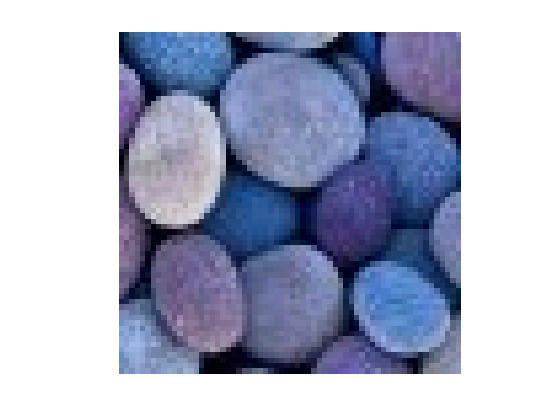

In [8]:
imshow(Xim)#plot the image (see: imshow)

In [9]:
Xred = Xim(:,:,1);# red
Xgre = Xim(:,:,2);# green
Xblu = Xim(:,:,3);# blue

In [10]:
h=64;# Let h = 64 be the side length of the image
n=h*h; #and n = h×h be the number of pixels.

In [11]:
#ci = [Xxy1 Xxy2 Xxy3]T
C =[reshape(Xred',n,1) reshape(Xgre',n,1) reshape(Xblu', n,1)];
DC=double(C);

In [12]:
function sim = calW(Cmat,firRow,firCol,secRow,secCol,we,sig,siz)  
    #diff=ci-cj
    diff=Cmat(((firRow-1)*siz)+firCol,:)-Cmat(((secRow-1)*siz)+secCol,:);
    sim=exp(-1*sum((we*diff').^2)/(2*(sig^2)));#sim(i,j)
end

In [13]:
W = zeros(n,n);
r = 2; sigma = 10.0;    
weigs=[ 0.299 0.587 0.114; -.14713 -.28886 0.436 ; 0.615 -.51499 -.10001];
for irow=1:h#for first pixel, visit all rows
    for icol=1:h#for first pixel, visit all columns
        maxrow=irow+r;
        maxcol=icol+r;
        if(maxrow>h) maxrow=h; endif
        if(maxcol>h) maxcol=h; endif
        for jrow=(irow):(maxrow)#visit right adjacent pixels of first pixel 
            for jcol=(icol):(maxcol)# visit adjacent pixels below of first pixel 
                if(!(irow==jrow) | !(icol==jcol))#if i != j
                    wtemp= calW(DC,irow,icol,jrow,jcol,weigs,sigma,h);#calculate similarity
                    W(((irow-1)*h)+icol,((jrow-1)*h)+jcol) = wtemp;#set it to Wij
                    W(((jrow-1)*h)+jcol,((irow-1)*h)+icol) = wtemp;#set it to Wji
                endif
            endfor
        endfor
    endfor
endfor

In [14]:
D=diag(sum(W));#diagonal degree matrix D
Dnorcut=diag(1./sqrt(sum(W)));#D^(-1/2)
L=Dnorcut*W*Dnorcut;#Laplacian Matrix L
k=5;
Q=qr(rand(n,k));#for QR iterations, get a Q
for i=1:1000
 Q = qr(L*Q);#Q = [q1 q2 · · · qk]
 if(mod(i,50)==0)
     i
 endif
endfor

i =  50
i =  100
i =  150
i =  200
i =  250
i =  300
i =  350
i =  400
i =  450
i =  500
i =  550
i =  600
i =  650
i =  700
i =  750
i =  800
i =  850
i =  900
i =  950
i =  1000


In [15]:
V=Dnorcut*Q;#V = D^(1/2) * Q

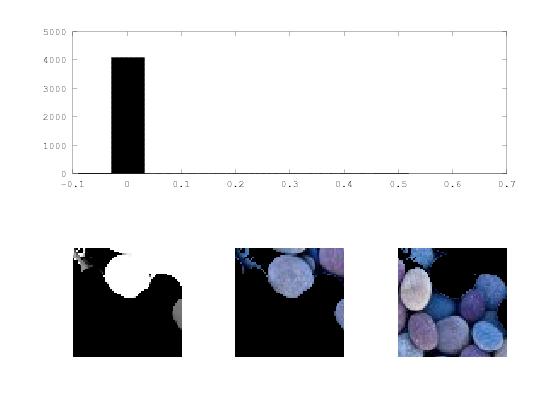

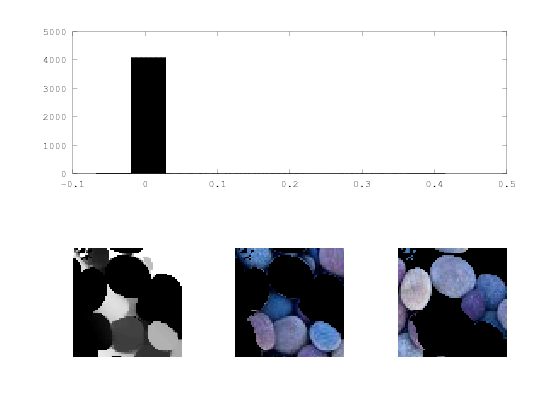

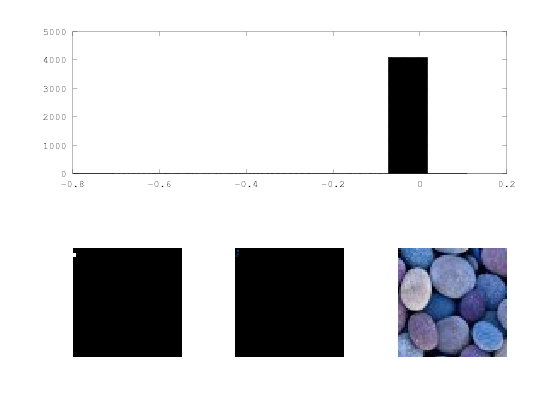

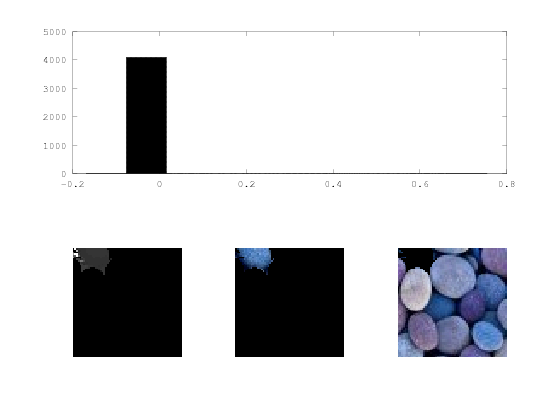

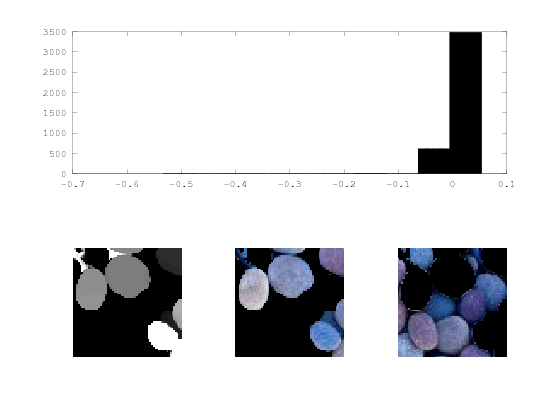

In [16]:
for gg=1:k # plot all 
    tempIm1=Xim;#Cluster 1
    tempIm2=Xim;#Cluster 2
    tempV=reshape(V(:,gg)',[h,h])';#Vk
    for i=1:h
        for j=1:h
            if(tempV(i,j)<0)
                tempIm1(i,j,:)=[0 0 0];
            else 
                tempIm2(i,j,:)=[0 0 0];
            endif
        endfor
    endfor
    figure;
    subplot(2,3,1:3);
    hist(V(:,gg));
    subplot(2,3,4);
    imshow(tempV*128); 
    subplot(2,3,5);
    imshow(tempIm1);
    subplot(2,3,6);
    imshow(tempIm2);
endfor